# Teoric exercise

Indica si generalmente esperaríamos que el rendimiento de un método flexible de aprendizaje estadístico sea mejor o peor que un método inflexible.

A) n > p: Cuado se tienen muchos datos (n>p) se podria esperar un mejor rendimiento de metodos flexibles (cuidando de no seguir el ruido). Esto haria que se cojan patrones mas complejos y haya un aprnedizaje mas robusto.

B) p > n: CUando hay pocos datos, los metodos mas flexibles serian incapaces de capturar la tendencia debido a la falta de los datos. Un metodo inflexible agruparia (dado ciertos supuestos) mejores patrones. 

C) Si la relacion entre predictores es altamente no lineal, entonces se esperaria que el rendimiento de las metodologias mas flexibles ofrezcan un mejor resultado. 

D) La varianza de los errores es extremadamente alta:  Si hay mucha variabilidad los metodos mas flexibles corren el riesgo de irse por este ruido y no capturar el patron real. ENtonces aca es mejor un metodo inflexible. 

## Ventajas y desventajas de modelos flexibles e inflexibles:

Respecto a los modelos mas flexibles, son buenos para capturar atrones no lineales, siguiendo la tendencia de los datos (incluso si es compleja) pero se ha de tener una cantidad de datos considerables (empiricamente n*0.1>p) de esta manera, se asegura que sea una buena metodologia. 

Las posibles desventajas radican en la sobreparametrizacion (overfitting porque suena mas chimba). Tambien y en su mayoria, carecen de interpretacion (los parametros). Se han de estimar muchos parametros. 

Todo esto contrasta con los metodos inflexibles que no aplica ello. 


# College dataset

In [2]:
# Choosing path
import easygui 
import janitor 

#CSV to read
import pandas as pd

# open file
ruta = easygui.fileopenbox()


c:\Users\jhongamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
c:\Users\jhongamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


In [3]:
df = pd.read_csv(ruta, sep = ",")
df = janitor.clean_names(df)
df.head()

,unnamed_0,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college3 = df.rename({'unnamed_0': 'College'},
axis=1)
college3 = college3.set_index('College')
college3.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
college3.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='top10perc', ylabel='top10perc'>,
        <Axes: xlabel='apps', ylabel='top10perc'>,
        <Axes: xlabel='enroll', ylabel='top10perc'>],
       [<Axes: xlabel='top10perc', ylabel='apps'>,
        <Axes: xlabel='apps', ylabel='apps'>,
        <Axes: xlabel='enroll', ylabel='apps'>],
       [<Axes: xlabel='top10perc', ylabel='enroll'>,
        <Axes: xlabel='apps', ylabel='enroll'>,
        <Axes: xlabel='enroll', ylabel='enroll'>]], dtype=object)

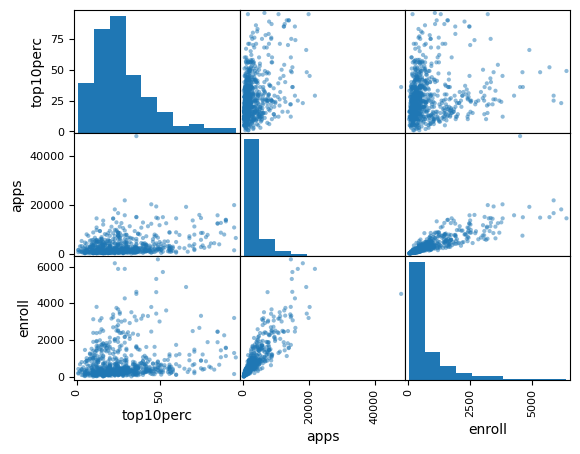

In [6]:
pd.plotting.scatter_matrix(college3[["top10perc", "apps", "enroll"]])


<Axes: title={'center': 'outstate'}, xlabel='private'>

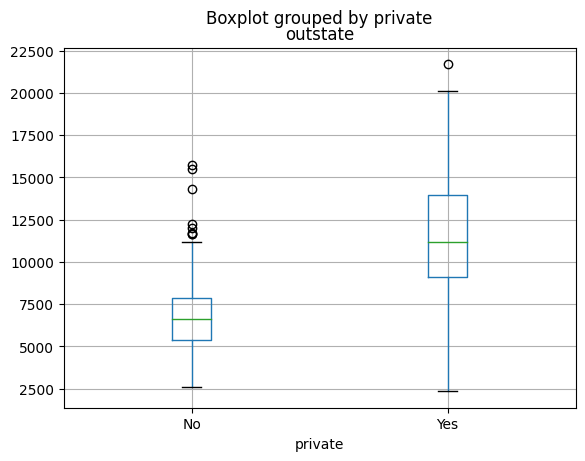

In [7]:
#Outstate versus Private
college3.boxplot(column="outstate", by="private", vert=True)

In [15]:
college = college3
import numpy as np
college["elite"] = np.where(college["top10perc"] > 50, "Yes", "No")
college["elite"].value_counts()

elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: title={'center': 'outstate'}, xlabel='elite'>

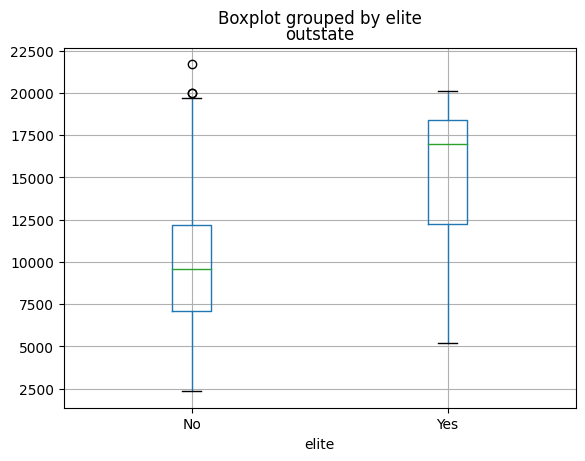

In [17]:
college.boxplot(column="outstate", by ="elite" )

(array([ 4., 13., 50., 43., 76., 66., 81., 62., 77., 65., 49., 45., 27.,
        22., 24., 20., 24., 23.,  5.,  1.]),
 array([ 2340.,  3308.,  4276.,  5244.,  6212.,  7180.,  8148.,  9116.,
        10084., 11052., 12020., 12988., 13956., 14924., 15892., 16860.,
        17828., 18796., 19764., 20732., 21700.]),
 <BarContainer object of 20 artists>)

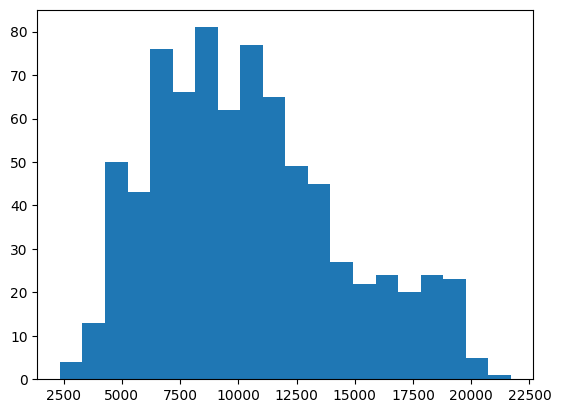

In [27]:
import matplotlib.pyplot as plt
plt.hist(college["outstate"], bins =20)